In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
#Special Imports
import inflect as inf
import re
import requests 
import bs4
from re import sub
from collections import Counter

In [3]:
###CAMELCASE FUNCTION###
def camel_case(s):
    #not true camelcase but adjusted for queries 
    
  s = sub(r"(_|-)+", " ", s).title().replace(" ", "")
  return ''.join([s[0].upper(), s[1:]])


In [4]:
#Read In DF
df = pd.read_csv('BigML_Dataset_5f50a62c2fb31c516d000176.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Columns: 119 entries, year to release_date.day-of-week
dtypes: float64(10), int64(46), object(63)
memory usage: 1.1+ MB


In [6]:
df.describe()

,year,duration,rate,metascore,votes,gross,user_reviews,critic_reviews,popularity,awards_wins,...,Boston_Society_of_Film_Critics_won,Boston_Society_of_Film_Critics_nominated,New_York_Film_Critics_Circle_won,New_York_Film_Critics_Circle_nominated,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_nominated,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
count,1183.000000,1183.000000,1183.000000,1169.000000,1.183000e+03,1.159000e+03,1176.000000,1176.000000,1064.000000,1183.000000,...,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.00000,1174.000000,1174.000000,1174.000000,1174.000000
mean,2008.189349,116.176669,7.045478,63.744226,1.925260e+05,8.609816e+07,568.876701,269.219388,1296.877820,2.894336,...,0.165680,0.319527,0.146238,0.313609,0.180051,0.32967,2008.321976,6.737649,16.036627,4.699319
std,5.019049,19.615381,0.826094,16.973300,1.912311e+05,1.011521e+08,564.816928,144.088080,1019.818482,6.237800,...,0.582839,0.886646,0.513523,0.841324,0.574890,0.89340,4.978752,3.693869,8.324177,0.744894
min,2000.000000,70.000000,2.400000,9.000000,5.070000e+02,1.207000e+03,3.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2000.000000,1.000000,1.000000,1.000000
25%,2004.000000,102.000000,6.600000,51.000000,6.550700e+04,1.603000e+07,219.000000,165.000000,524.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2004.000000,3.000000,9.000000,5.000000
50%,2008.000000,114.000000,7.100000,65.000000,1.402320e+05,5.275000e+07,408.000000,239.000000,1088.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2008.000000,7.000000,16.000000,5.000000
75%,2013.000000,128.000000,7.600000,77.000000,2.631190e+05,1.193700e+08,709.750000,351.000000,1772.750000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2013.000000,10.000000,23.000000,5.000000
max,2017.000000,224.000000,9.000000,100.000000,1.743331e+06,9.366300e+08,5078.000000,816.000000,4937.000000,49.000000,...,5.000000,6.000000,5.000000,6.000000,5.000000,7.00000,2018.000000,12.000000,31.000000,7.000000


In [7]:
df.head()

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,...,0,NaN,0,NaN,0,NaN,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,tt0120630,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,...,1,Best Animated Film,1,Best Animation,1,Best Animation,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,tt0120667,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,...,0,NaN,0,NaN,0,NaN,2005.0,7.0,8.0,5.0
3,2002,Frida,tt0120679,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,...,0,NaN,0,NaN,0,NaN,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,tt0120737,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,A meek Hobbit from the Shire and eight compani...,1286275,...,0,NaN,1,Best Music,2,Best Music|Best Production Design,2001.0,12.0,19.0,3.0


<AxesSubplot:>

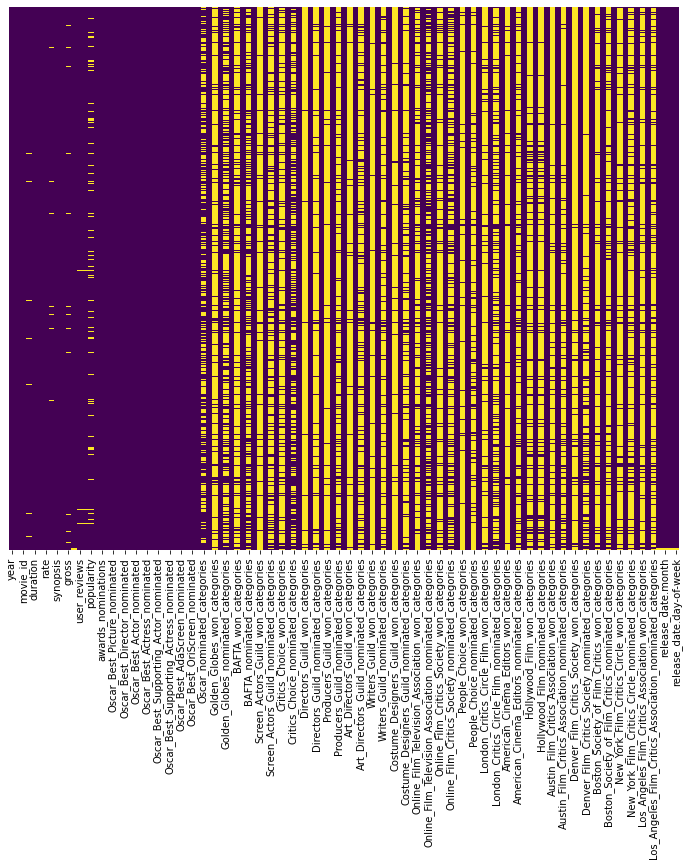

In [8]:
plt.figure(figsize = (12,10))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [9]:
#Need to split the genre string into a list
df['genre'] = df['genre'].apply(lambda string: string.split('|'))


In [10]:
for i in df.columns:
    print(i)

year
movie
movie_id
certificate
duration
genre
rate
metascore
synopsis
votes
gross
release_date
user_reviews
critic_reviews
popularity
awards_wins
awards_nominations
Oscar_Best_Picture_won
Oscar_Best_Picture_nominated
Oscar_Best_Director_won
Oscar_Best_Director_nominated
Oscar_Best_Actor_won
Oscar_Best_Actor_nominated
Oscar_Best_Actress_won
Oscar_Best_Actress_nominated
Oscar_Best_Supporting_Actor_won
Oscar_Best_Supporting_Actor_nominated
Oscar_Best_Supporting_Actress_won
Oscar_Best_Supporting_Actress_nominated
Oscar_Best_AdaScreen_won
Oscar_Best_AdaScreen_nominated
Oscar_Best_OriScreen_won
Oscar_Best_OriScreen_nominated
Oscar_nominated
Oscar_nominated_categories
Golden_Globes_won
Golden_Globes_won_categories
Golden_Globes_nominated
Golden_Globes_nominated_categories
BAFTA_won
BAFTA_won_categories
BAFTA_nominated
BAFTA_nominated_categories
Screen_Actors_Guild_won
Screen_Actors_Guild_won_categories
Screen_Actors_Guild_nominated
Screen_Actors_Guild_nominated_categories
Critics_Choice_won


In [11]:
#Pick the Oscars columns, and some of the more reliable columns for the other movies. 
oscar = df[['year', 'movie', 'certificate', 'duration', 'metascore', 'rate', 'user_reviews',
 'genre', 'gross', 'release_date', 'Oscar_Best_Picture_won',
 'Oscar_Best_Picture_nominated', 'Oscar_Best_Director_won',
'Oscar_Best_Director_nominated', 'Oscar_Best_Actor_won' ,
'Oscar_Best_Actor_nominated', 'Oscar_Best_Actress_won',
 'Oscar_Best_Actress_nominated',
'Oscar_Best_Supporting_Actor_won',
'Oscar_Best_Supporting_Actor_nominated',
'Oscar_Best_Supporting_Actress_won',
'Oscar_Best_Supporting_Actress_nominated',
'Oscar_Best_AdaScreen_won',
'Oscar_Best_AdaScreen_nominated',
'Oscar_Best_OriScreen_won',
'Oscar_Best_OriScreen_nominated',
'Oscar_nominated',
'Oscar_nominated_categories',
'release_date.year',
'release_date.month',
'release_date.day-of-month',
'release_date.day-of-week']].copy()


In [12]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     1183 non-null   int64  
 1   movie                                    1183 non-null   object 
 2   certificate                              1173 non-null   object 
 3   duration                                 1183 non-null   int64  
 4   metascore                                1169 non-null   float64
 5   rate                                     1183 non-null   float64
 6   user_reviews                             1176 non-null   float64
 7   genre                                    1183 non-null   object 
 8   gross                                    1159 non-null   float64
 9   release_date                             1174 non-null   object 
 10  Oscar_Best_Picture_won                   1183 no

In [13]:
oscar.describe()

,year,duration,metascore,rate,user_reviews,gross,Oscar_nominated,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
count,1183.000000,1183.000000,1169.000000,1183.000000,1176.000000,1.159000e+03,1183.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,2008.189349,116.176669,63.744226,7.045478,568.876701,8.609816e+07,1.449704,2008.321976,6.737649,16.036627,4.699319
std,5.019049,19.615381,16.973300,0.826094,564.816928,1.011521e+08,2.310638,4.978752,3.693869,8.324177,0.744894
min,2000.000000,70.000000,9.000000,2.400000,3.000000,1.207000e+03,0.000000,2000.000000,1.000000,1.000000,1.000000
25%,2004.000000,102.000000,51.000000,6.600000,219.000000,1.603000e+07,0.000000,2004.000000,3.000000,9.000000,5.000000
50%,2008.000000,114.000000,65.000000,7.100000,408.000000,5.275000e+07,1.000000,2008.000000,7.000000,16.000000,5.000000
75%,2013.000000,128.000000,77.000000,7.600000,709.750000,1.193700e+08,2.000000,2013.000000,10.000000,23.000000,5.000000
max,2017.000000,224.000000,100.000000,9.000000,5078.000000,9.366300e+08,14.000000,2018.000000,12.000000,31.000000,7.000000


In [14]:
oscar.sort_values(['year', 'movie'])

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Oscar_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
94,2000,102 Dalmatians,G,100,35.0,4.8,77.0,"[Adventure, Comedy, Family]",66940000.0,2000-11-22,...,No,No,No,No,1,Best Costume Design,2000.0,11.0,22.0,3.0
51,2000,Almost Famous,R,122,90.0,7.9,826.0,"[Adventure, Comedy, Drama]",32520000.0,2000-09-22,...,No,No,Yes,Yes,4,Best Original Screenplay|Best Performance by a...,2000.0,9.0,22.0,5.0
18,2000,American Psycho,R,102,64.0,7.6,1071.0,"[Crime, Drama]",15050000.0,2000-04-14,...,No,No,No,No,0,NaN,2000.0,4.0,14.0,5.0
134,2000,Amores Perros,R,154,83.0,8.1,362.0,"[Drama, Thriller]",5380000.0,2001-04-13,...,No,No,No,No,1,Best Foreign Language Film,2001.0,4.0,13.0,5.0
57,2000,Battlefield Earth,PG-13,118,9.0,2.4,1311.0,"[Action, Adventure, Sci-Fi]",21470000.0,2000-05-12,...,No,No,No,No,0,NaN,2000.0,5.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2017,The Shape of Water,R,123,86.0,7.9,308.0,"[Adventure, Drama, Fantasy]",37900000.0,2017-12-22,...,No,No,No,Yes,13,Best Achievement in Directing|Best Motion Pict...,2017.0,12.0,22.0,5.0
1169,2017,"Three Billboards Outside Ebbing, Missouri",R,115,88.0,8.3,369.0,"[Crime, Drama]",37250000.0,NaN,...,No,No,No,Yes,7,Best Motion Picture of the Year|Best Performan...,NaN,NaN,NaN,NaN
1180,2017,Victoria & Abdul,PG-13,111,58.0,6.8,82.0,"[Biography, Drama, History]",22250000.0,2017-10-06,...,No,No,No,No,2,Best Achievement in Makeup and Hairstyling|Bes...,2017.0,10.0,6.0,5.0
1118,2017,War for the Planet of the Apes,PG-13,140,82.0,7.5,708.0,"[Action, Adventure, Drama]",146880000.0,2017-07-14,...,No,No,No,No,1,Best Achievement in Visual Effects,2017.0,7.0,14.0,5.0


In [15]:
oscar = oscar.drop(['release_date.year','release_date.month','release_date.day-of-month', 'release_date.day-of-week'], axis = 1)

In [16]:
oscar.head()

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Oscar_nominated_categories
0,2001,Kate & Leopold,PG-13,118,44.0,6.4,318.0,"[Comedy, Fantasy, Romance]",47100000.0,2001-12-25,...,No,No,No,No,No,No,No,No,1,"Best Music, Original Song"
1,2000,Chicken Run,G,84,88.0,7.0,361.0,"[Animation, Adventure, Comedy]",106790000.0,2000-06-23,...,No,No,No,No,No,No,No,No,0,NaN
2,2005,Fantastic Four,PG-13,106,40.0,5.7,1008.0,"[Action, Adventure, Family]",154700000.0,2005-07-08,...,No,No,No,No,No,No,No,No,0,NaN
3,2002,Frida,R,123,61.0,7.4,272.0,"[Biography, Drama, Romance]",25780000.0,2002-11-22,...,No,No,No,No,No,No,No,No,6,"Best Music, Original Score|Best Makeup|Best Pe..."
4,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,92.0,8.8,5078.0,"[Adventure, Drama, Fantasy]",313840000.0,2001-12-19,...,No,Yes,No,No,No,Yes,No,No,13,"Best Cinematography|Best Makeup|Best Music, Or..."


In [17]:
oscar['Nominated Categories'] = oscar['Oscar_nominated_categories'].fillna('').apply(lambda line: line.split('|'))

In [18]:
oscar.drop('Oscar_nominated_categories', axis= 1, inplace = True)

In [19]:
oscar.head()

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories
0,2001,Kate & Leopold,PG-13,118,44.0,6.4,318.0,"[Comedy, Fantasy, Romance]",47100000.0,2001-12-25,...,No,No,No,No,No,No,No,No,1,"[Best Music, Original Song]"
1,2000,Chicken Run,G,84,88.0,7.0,361.0,"[Animation, Adventure, Comedy]",106790000.0,2000-06-23,...,No,No,No,No,No,No,No,No,0,[]
2,2005,Fantastic Four,PG-13,106,40.0,5.7,1008.0,"[Action, Adventure, Family]",154700000.0,2005-07-08,...,No,No,No,No,No,No,No,No,0,[]
3,2002,Frida,R,123,61.0,7.4,272.0,"[Biography, Drama, Romance]",25780000.0,2002-11-22,...,No,No,No,No,No,No,No,No,6,"[Best Music, Original Score, Best Makeup, Best..."
4,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,92.0,8.8,5078.0,"[Adventure, Drama, Fantasy]",313840000.0,2001-12-19,...,No,Yes,No,No,No,Yes,No,No,13,"[Best Cinematography, Best Makeup, Best Music,..."


In [20]:
#We map the strings No, Yes into numbers for easy evaluation
bool_dict = {'No': 0 , 'Yes': 1}

In [21]:
oscar['Oscar_Best_Picture_won'] = oscar['Oscar_Best_Picture_won'].map(bool_dict)
oscar['Oscar_Best_Picture_nominated'] = oscar[ 'Oscar_Best_Picture_nominated'].map(bool_dict)
oscar['Oscar_Best_Director_won'] = oscar['Oscar_Best_Director_won'].map(bool_dict)
oscar['Oscar_Best_Director_nominated'] = oscar['Oscar_Best_Director_nominated'].map(bool_dict)
oscar['Oscar_Best_Actor_won'] = oscar['Oscar_Best_Actor_won'].map(bool_dict)
oscar['Oscar_Best_Actor_nominated'] = oscar['Oscar_Best_Actor_nominated'].map(bool_dict)
oscar['Oscar_Best_Actress_won'] = oscar['Oscar_Best_Actress_won'].map(bool_dict)
oscar['Oscar_Best_Actress_nominated'] = oscar['Oscar_Best_Actress_nominated'].map(bool_dict)
oscar['Oscar_Best_Supporting_Actor_won'] = oscar['Oscar_Best_Supporting_Actor_won'].map(bool_dict)
oscar['Oscar_Best_Supporting_Actor_nominated'] = oscar['Oscar_Best_Supporting_Actor_nominated'].map(bool_dict)
oscar['Oscar_Best_Supporting_Actress_won'] = oscar['Oscar_Best_Supporting_Actress_won'].map(bool_dict)
oscar['Oscar_Best_Supporting_Actress_nominated'] = oscar['Oscar_Best_Supporting_Actress_nominated'].map(bool_dict)
oscar['Oscar_Best_AdaScreen_won'] = oscar['Oscar_Best_AdaScreen_won'].map(bool_dict)
oscar['Oscar_Best_AdaScreen_nominated'] = oscar['Oscar_Best_AdaScreen_nominated'].map(bool_dict)
oscar['Oscar_Best_OriScreen_won'] = oscar['Oscar_Best_OriScreen_won'].map(bool_dict)
oscar['Oscar_Best_OriScreen_nominated'] = oscar['Oscar_Best_OriScreen_nominated'].map(bool_dict)

In [22]:
#We process the release date into a datetime object,
#Make OscarsWon column, and Oscar Win Ratio
#Check gross, metascore, and Oscar Win Ratio

In [23]:
oscar.head()

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories
0,2001,Kate & Leopold,PG-13,118,44.0,6.4,318.0,"[Comedy, Fantasy, Romance]",47100000.0,2001-12-25,...,0,0,0,0,0,0,0,0,1,"[Best Music, Original Song]"
1,2000,Chicken Run,G,84,88.0,7.0,361.0,"[Animation, Adventure, Comedy]",106790000.0,2000-06-23,...,0,0,0,0,0,0,0,0,0,[]
2,2005,Fantastic Four,PG-13,106,40.0,5.7,1008.0,"[Action, Adventure, Family]",154700000.0,2005-07-08,...,0,0,0,0,0,0,0,0,0,[]
3,2002,Frida,R,123,61.0,7.4,272.0,"[Biography, Drama, Romance]",25780000.0,2002-11-22,...,0,0,0,0,0,0,0,0,6,"[Best Music, Original Score, Best Makeup, Best..."
4,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,92.0,8.8,5078.0,"[Adventure, Drama, Fantasy]",313840000.0,2001-12-19,...,0,1,0,0,0,1,0,0,13,"[Best Cinematography, Best Makeup, Best Music,..."


In [24]:
oscar['release_date'].apply(pd.to_datetime) #Here's where I see missing release dates
#Let's do a heatmap to see if theres more missing stuff

0      2001-12-25
1      2000-06-23
2      2005-07-08
3      2002-11-22
4      2001-12-19
          ...    
1178          NaT
1179          NaT
1180   2017-10-06
1181          NaT
1182   2018-01-12
Name: release_date, Length: 1183, dtype: datetime64[ns]

<AxesSubplot:>

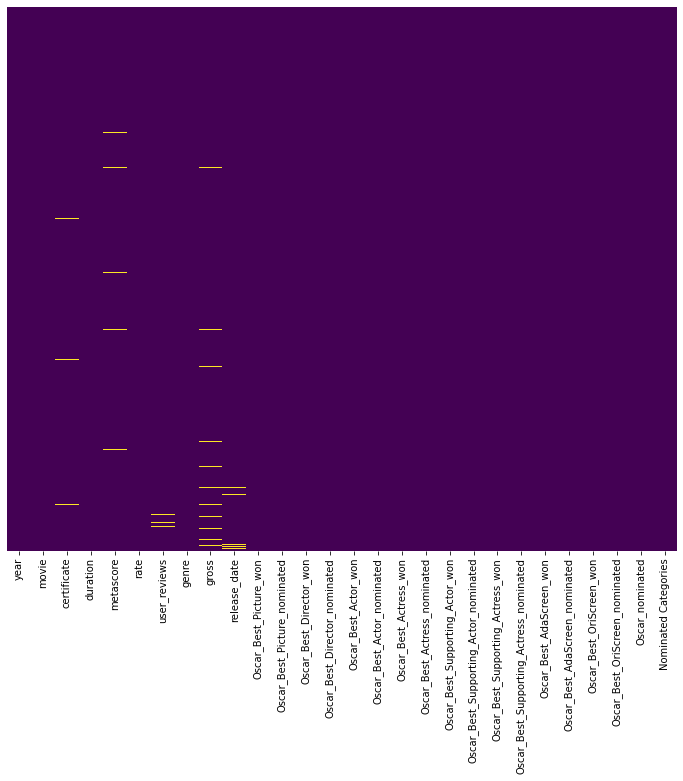

In [25]:
plt.figure(figsize = (12,10))
sns.heatmap(oscar.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [26]:
oscar[oscar['certificate'].isna()]

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories
319,2002,The Twilight Samurai,NaN,129,82.0,8.1,101.0,"[Drama, History]",NaN,2002-11-02,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film]
380,2004,As It Is in Heaven,NaN,133,NaN,7.6,95.0,"[Comedy, Drama, Music]",10000.0,2006-11-03,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
459,2005,Sophie Scholl: The Final Days,NaN,120,76.0,7.7,103.0,"[Biography, Crime, Drama]",680000.0,2005-02-24,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
639,2007,Katyn,NaN,121,81.0,7.1,80.0,"[Drama, History, War]",120000.0,2007-09-21,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
722,2009,Ajami,NaN,124,82.0,7.4,32.0,"[Crime, Drama]",620000.0,2010-03-26,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
766,2009,The Milk of Sorrow,NaN,94,68.0,6.7,25.0,"[Drama, Music]",10000.0,2009-02-13,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
822,2009,Guy and Madeline on a Park Bench,NaN,82,84.0,6.2,10.0,"[Drama, Musical]",30000.0,2010-07-01,...,0,0,0,0,0,0,0,0,0,[]
1082,2013,Omar,NaN,96,75.0,7.6,34.0,"[Drama, Romance, Thriller]",NaN,2013-10-16,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
1102,2014,Theeb,NaN,100,80.0,7.3,35.0,"[Adventure, Drama, Thriller]",280000.0,2015-03-19,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
1152,2015,Tanna,NaN,100,74.0,7.1,6.0,"[Drama, Romance]",10000.0,2016-03-10,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]


In [27]:
#Manually impute missing data
#Having manually checked these:
#All the NA's in  the certificate column, are actually NR--Not Rated movies

oscar['certificate'] = oscar['certificate'].fillna('Not Rated')



In [28]:
oscar['certificate'].value_counts() #We need to move the unrated ones to Not Rated

R            515
PG-13        489
PG           130
Not Rated     24
G             20
Unrated        4
TV-MA          1
Name: certificate, dtype: int64

In [29]:
# doesnt work oscar[oscar['certificate']=='Unrated'].at[:,'certificate'] = 'Not Rated'

In [30]:
# doesnt work oscar['certificate'].apply(lambda line: line.replace('Unrated', 'Not Rated'))

In [31]:
oscar[oscar['certificate'] == 'Unrated']

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories
130,2001,Zus & zo,Unrated,106,50.0,6.4,20.0,"[Comedy, Fantasy, Romance]",NaN,2002-05-08,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film]
577,2007,Beaufort,Unrated,131,NaN,6.8,27.0,"[Action, Drama, War]",100000.0,2008-01-18,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
781,2010,Outside the Law,Unrated,138,59.0,6.6,17.0,"[Crime, Drama, War]",NaN,2010-09-22,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
836,2009,Dogtooth,Unrated,94,73.0,7.3,181.0,"[Drama, Thriller]",110000.0,2009-11-11,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]


In [32]:
oscar.loc[[130,577,781,836], 'certificate'] = 'Not Rated'

In [33]:
oscar['certificate'].value_counts()

R            515
PG-13        489
PG           130
Not Rated     28
G             20
TV-MA          1
Name: certificate, dtype: int64

In [34]:
oscar[oscar['certificate'] == 'TV-MA']

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories
1171,2016,Jim: The James Foley Story,TV-MA,111,73.0,7.8,3.0,"[Documentary, Biography]",NaN,2016-09-02,...,0,0,0,0,0,0,0,0,1,[Best Achievement in Music Written for Motion ...


<AxesSubplot:>

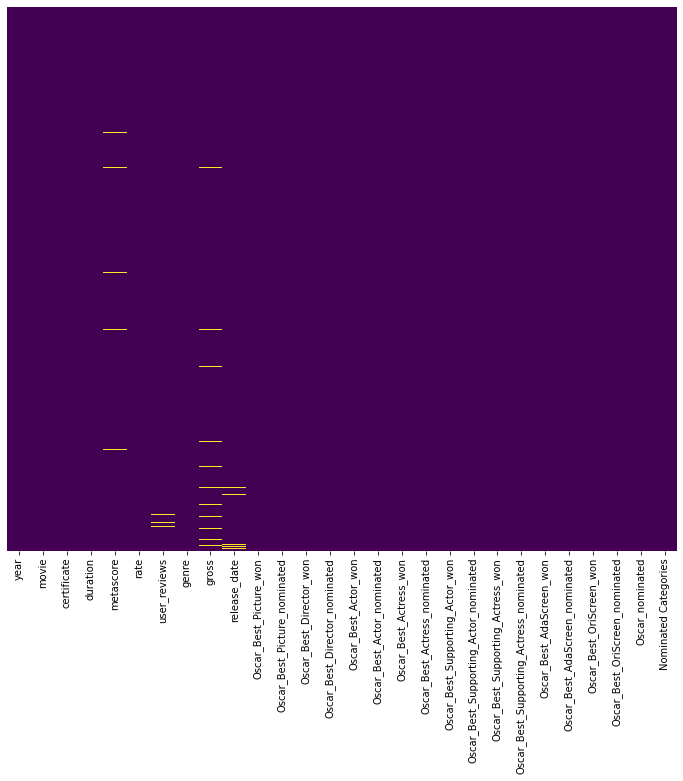

In [35]:
plt.figure(figsize = (12,10))
sns.heatmap(oscar.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [36]:
oscar[oscar['metascore'].isna()]

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories
88,2002,Ken Park,Not Rated,93,NaN,5.9,158.0,[Drama],NaN,2003-04-03,...,0,0,0,0,0,0,0,0,0,[]
272,2002,Twin Sisters,R,137,NaN,7.5,30.0,"[Drama, Romance, War]",1207.0,2002-12-12,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film]
348,2003,The Room,R,99,NaN,3.5,324.0,[Drama],NaN,2004-03-03,...,0,0,0,0,0,0,0,0,0,[]
380,2004,As It Is in Heaven,Not Rated,133,NaN,7.6,95.0,"[Comedy, Drama, Music]",10000.0,2006-11-03,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
450,2004,Yesterday,R,90,NaN,7.8,32.0,[Drama],NaN,2004-09-03,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
474,2006,The Queen,PG-13,103,NaN,7.3,426.0,"[Biography, Drama]",56437947.0,2006-11-17,...,0,0,0,0,0,0,0,1,6,[Best Performance by an Actress in a Leading R...
577,2007,Beaufort,Not Rated,131,NaN,6.8,27.0,"[Action, Drama, War]",100000.0,2008-01-18,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
652,2010,Unthinkable,R,97,NaN,7.1,257.0,"[Drama, Thriller]",NaN,2010-05-26,...,0,0,0,0,0,0,0,0,0,[]
669,2008,"Angus, Thongs and Perfect Snogging",PG-13,100,NaN,6.4,66.0,"[Comedy, Drama, Romance]",NaN,2008-07-25,...,0,0,0,0,0,0,0,0,0,[]
700,2007,Death Proof,Not Rated,113,NaN,7.1,592.0,[Thriller],NaN,2007-05-31,...,0,0,0,0,0,0,0,0,0,[]


In [37]:
oscar.loc[[88, 272, 348,
           380, 450, 474,
          577, 652, 669,
           700,701,857,
           962, 992],'metascore'] = [None ,None, 9, 
                                    71, None, 91, 
                                    None, None, None,
                                    None, None, 73, 
                                    87, None] 

In [38]:
oscar[oscar['metascore'].isna()] #Genuinely no metascore for these

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories
88,2002,Ken Park,Not Rated,93,None,5.9,158.0,[Drama],NaN,2003-04-03,...,0,0,0,0,0,0,0,0,0,[]
272,2002,Twin Sisters,R,137,None,7.5,30.0,"[Drama, Romance, War]",1207.0,2002-12-12,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film]
450,2004,Yesterday,R,90,None,7.8,32.0,[Drama],NaN,2004-09-03,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
577,2007,Beaufort,Not Rated,131,None,6.8,27.0,"[Action, Drama, War]",100000.0,2008-01-18,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
652,2010,Unthinkable,R,97,None,7.1,257.0,"[Drama, Thriller]",NaN,2010-05-26,...,0,0,0,0,0,0,0,0,0,[]
669,2008,"Angus, Thongs and Perfect Snogging",PG-13,100,None,6.4,66.0,"[Comedy, Drama, Romance]",NaN,2008-07-25,...,0,0,0,0,0,0,0,0,0,[]
700,2007,Death Proof,Not Rated,113,None,7.1,592.0,[Thriller],NaN,2007-05-31,...,0,0,0,0,0,0,0,0,0,[]
701,2009,Hachi: A Dog's Tale,G,93,None,8.1,313.0,"[Drama, Family]",NaN,2010-03-12,...,0,0,0,0,0,0,0,0,0,[]
992,2013,Alone Yet Not Alone,PG-13,103,None,4.2,13.0,[History],670000.0,2013-09-27,...,0,0,0,0,0,0,0,0,1,[Best Achievement in Music Written for Motion ...


<AxesSubplot:>

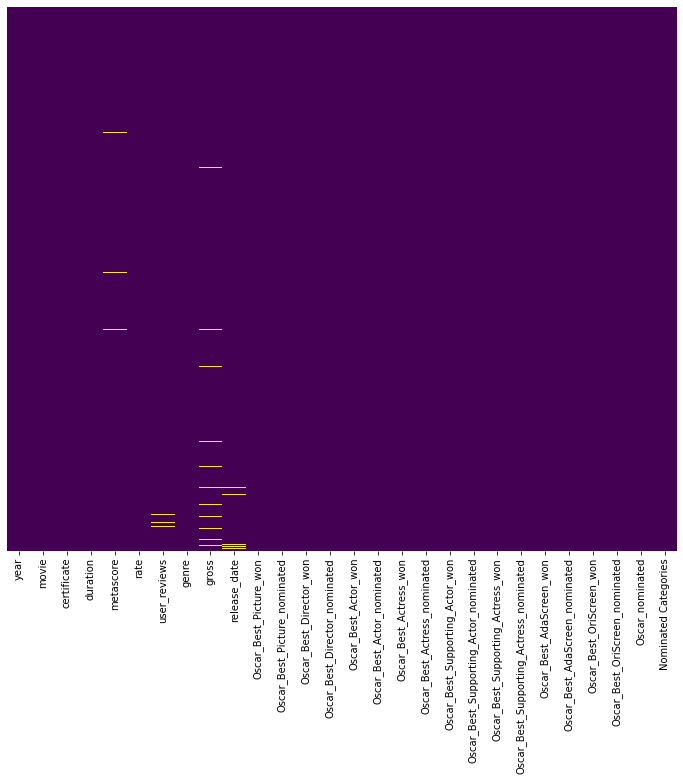

In [39]:
plt.figure(figsize = (12,10))
sns.heatmap(oscar.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [42]:
oscar[oscar['user_reviews'].isna()]

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories
574,2006,Letters from Iwo Jima,R,141,91.0,7.9,NaN,"[Drama, History, War]",13753931.0,2007-02-02,...,0,0,0,0,0,0,0,1,4,"[Best Achievement in Sound Editing, Best Motio..."
1094,2016,Inferno,PG-13,121,42.0,6.2,NaN,"[Action, Adventure, Crime]",34260000.0,2016-10-28,...,0,0,0,0,0,0,0,0,0,[]
1104,2016,Fantastic Beasts and Where to Find Them,PG-13,133,66.0,7.7,NaN,"[Adventure, Family, Fantasy]",229180000.0,2016-11-18,...,0,0,0,0,0,0,0,0,2,"[Best Achievement in Costume Design, Best Achi..."
1116,2016,A Monster Calls,PG-13,108,76.0,7.8,NaN,"[Drama, Fantasy]",2170000.0,2017-01-06,...,0,0,0,0,0,0,0,0,0,[]
1121,2016,Sing,PG,108,59.0,7.3,NaN,"[Animation, Comedy, Drama]",238240000.0,2016-12-21,...,0,0,0,0,0,0,0,0,0,[]
1124,2016,Moana,PG,107,81.0,8.0,NaN,"[Animation, Adventure, Comedy]",233410000.0,2016-11-23,...,0,0,0,0,0,0,0,0,2,"[Best Animated Feature Film of the Year, Best ..."
1130,2016,The Girl on the Train,R,112,48.0,6.6,NaN,"[Drama, Mystery, Thriller]",75310000.0,2016-10-07,...,0,0,0,0,0,0,0,0,0,[]


In [43]:
oscar.loc[oscar[oscar['user_reviews'].isna()].index, 'user_reviews'] = [354, 202, 1238, 249, 273 , 805, 255]

In [44]:
oscar[oscar['user_reviews'].isna()]

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories


<AxesSubplot:>

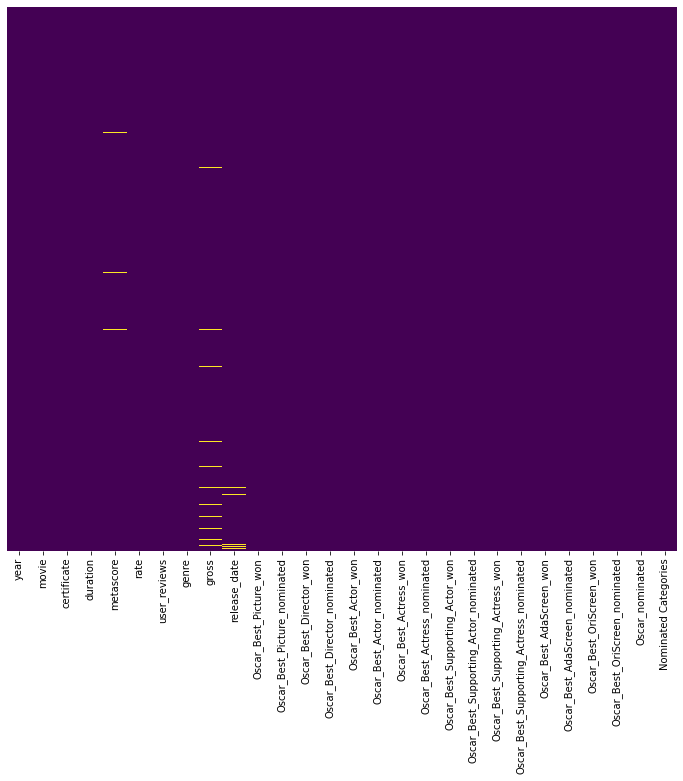

In [45]:
plt.figure(figsize = (12,10))
sns.heatmap(oscar.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [46]:
oscar[oscar['gross'].isna()]

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories
40,2001,Lagaan: Once Upon a Time in India,PG,224,84.0,8.2,248.0,"[Adventure, Drama, Musical]",NaN,2002-05-08,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film]
88,2002,Ken Park,Not Rated,93,None,5.9,158.0,[Drama],NaN,2003-04-03,...,0,0,0,0,0,0,0,0,0,[]
130,2001,Zus & zo,Not Rated,106,50.0,6.4,20.0,"[Comedy, Fantasy, Romance]",NaN,2002-05-08,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film]
319,2002,The Twilight Samurai,Not Rated,129,82.0,8.1,101.0,"[Drama, History]",NaN,2002-11-02,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film]
348,2003,The Room,R,99,9,3.5,324.0,[Drama],NaN,2004-03-03,...,0,0,0,0,0,0,0,0,0,[]
450,2004,Yesterday,R,90,None,7.8,32.0,[Drama],NaN,2004-09-03,...,0,0,0,0,0,0,0,0,1,[Best Foreign Language Film of the Year]
652,2010,Unthinkable,R,97,None,7.1,257.0,"[Drama, Thriller]",NaN,2010-05-26,...,0,0,0,0,0,0,0,0,0,[]
669,2008,"Angus, Thongs and Perfect Snogging",PG-13,100,None,6.4,66.0,"[Comedy, Drama, Romance]",NaN,2008-07-25,...,0,0,0,0,0,0,0,0,0,[]
700,2007,Death Proof,Not Rated,113,None,7.1,592.0,[Thriller],NaN,2007-05-31,...,0,0,0,0,0,0,0,0,0,[]
701,2009,Hachi: A Dog's Tale,G,93,None,8.1,313.0,"[Drama, Family]",NaN,2010-03-12,...,0,0,0,0,0,0,0,0,0,[]


In [49]:
oscar.loc[oscar[oscar['gross'].isna()].index,'gross'] = [1724806, 1058905, 281219,
                                                  7372769,  4988181, 246439, 
                                                  1669947, 14924998, 31126421,
                                                  46749646, 886407, 3470487,
                                                 34854990, 334933831, 85955, 
                                                 4439481, 614444, 11430025,
                                                 6170043, 12748594, 3169553,
                                                 4086096, 278454417, 8236 ]

In [50]:
# This does not work to index and replace , do you know why? 
# oscar['gross'].isna().index)

1183

In [51]:
oscar[oscar['gross'].isna()]

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories


<AxesSubplot:>

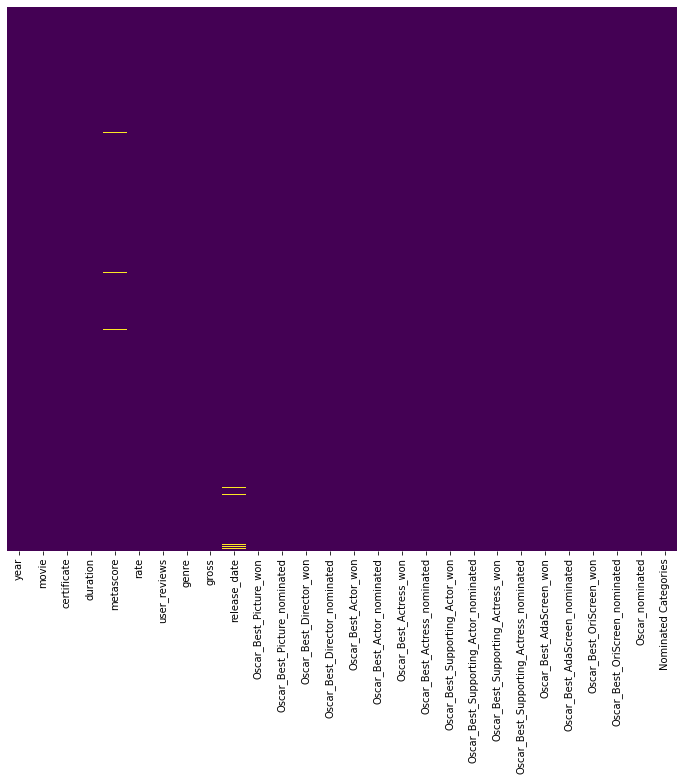

In [52]:
plt.figure(figsize = (12,10))
sns.heatmap(oscar.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [53]:
oscar[oscar['release_date'].isna()]

,year,movie,certificate,duration,metascore,rate,user_reviews,genre,gross,release_date,...,Oscar_Best_Supporting_Actor_won,Oscar_Best_Supporting_Actor_nominated,Oscar_Best_Supporting_Actress_won,Oscar_Best_Supporting_Actress_nominated,Oscar_Best_AdaScreen_won,Oscar_Best_AdaScreen_nominated,Oscar_Best_OriScreen_won,Oscar_Best_OriScreen_nominated,Oscar_nominated,Nominated Categories
1045,2017,Mudbound,R,134,85.0,7.5,74.0,[Drama],85955.0,NaN,...,0,0,0,1,0,1,0,0,4,[Best Performance by an Actress in a Supportin...
1060,2017,Wonder,PG,113,66.0,8.1,122.0,"[Drama, Family]",130560000.0,NaN,...,0,0,0,0,0,0,0,0,1,[Best Achievement in Makeup and Hairstyling]
1165,2017,Lady Bird,R,94,94.0,7.9,203.0,"[Comedy, Drama]",41610000.0,NaN,...,0,0,0,1,0,0,0,1,5,"[Best Motion Picture of the Year, Best Perform..."
1169,2017,"Three Billboards Outside Ebbing, Missouri",R,115,88.0,8.3,369.0,"[Crime, Drama]",37250000.0,NaN,...,0,1,0,0,0,0,0,1,7,"[Best Motion Picture of the Year, Best Perform..."
1173,2017,Marshall,PG-13,118,66.0,7.2,37.0,"[Biography, Drama]",10050000.0,NaN,...,0,0,0,0,0,0,0,0,1,[Best Achievement in Music Written for Motion ...
1177,2017,The Florida Project,R,111,92.0,7.8,126.0,[Drama],5660000.0,NaN,...,0,1,0,0,0,0,0,0,1,[Best Performance by an Actor in a Supporting ...
1178,2017,Call Me by Your Name,R,132,93.0,8.3,235.0,"[Drama, Romance]",11300000.0,NaN,...,0,0,0,0,0,1,0,0,4,[Best Performance by an Actor in a Leading Rol...
1179,2017,Phantom Thread,R,130,90.0,8.4,94.0,"[Drama, Romance]",10710000.0,NaN,...,0,0,0,1,0,0,0,0,6,[Best Performance by an Actor in a Leading Rol...
1181,2017,"Roman J. Israel, Esq.",PG-13,122,58.0,6.3,55.0,"[Crime, Drama]",11940000.0,NaN,...,0,0,0,0,0,0,0,0,1,[Best Performance by an Actor in a Leading Role]
